In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data_nu = pd.read_csv("./data/data_change_heart_disease_numerical.csv")
data_ca = pd.read_csv("./data/data_change_heart_disease_categorical.csv")


In [14]:
df = data_nu
df["HeartDisease"].loc[:]

0             Normal
1      Heart disease
2             Normal
3      Heart disease
4             Normal
           ...      
913    Heart disease
914    Heart disease
915    Heart disease
916    Heart disease
917           Normal
Name: HeartDisease, Length: 918, dtype: object

In [15]:
def convert_long_nu(df):
    df = df.reset_index(drop=True)
    data = pd.DataFrame()
    Features = df.columns
    for i in Features:
        if i == "HeartDisease":
            data['HeartDisease'] = df["HeartDisease"].loc[:]
            continue
        temp = pd.DataFrame()
        temp["Numeical feature value"]=df[i]
        temp["Numerical feature name"]=i
        data = pd.concat([data,temp],axis=0)
    return data
long_nu = convert_long_nu(data_nu)

def convert_long_ca(df):
    df = df.reset_index(drop=True)
    data = pd.DataFrame()
    Features = df.columns
    for i in Features:
        if i == "HeartDisease":
            data['HeartDisease'] = df["HeartDisease"].loc[:]
            continue
        temp = pd.DataFrame()
        temp["Categoical feature value"]=df[i]
        temp["Categorical feature name"]=i
        data = pd.concat([data,temp],axis=0)
        
    return data
long_ca = convert_long_ca(data_ca)

long_nu.to_csv("./Data/long_nu.csv")
long_ca.to_csv("./Data/long_ca.csv")


,Numeical feature value,Categorical feature name
0,40,Age
1,49,Age
2,37,Age
3,48,Age
4,54,Age
...,...,...
913,132,MaxHR
914,141,MaxHR
915,115,MaxHR
916,174,MaxHR


In [ ]:
# Spike features extraction and combine function
def spike_feature_extraction(spike_number,interval=False):
    PD = pd.read_csv("./features/total_features_PD.csv")
    Intact = pd.read_csv("./features/total_features_intact.csv") 
    if interval:
        spike_number_start=spike_number[0]
        spike_number_end=spike_number[1]
    else:
        spike_number_end=spike_number_start=spike_number
    PD1=PD[PD["spike_number"].between(spike_number_start,spike_number_end)]
    In1=Intact[Intact["spike_number"].between(spike_number_start,spike_number_end)]
    def convert_format_long(df):
        def data_cleaning(df):
            # clean the first three not useful columns  
            df = df.iloc[:,3:]
            df = df.reset_index(drop=True)
            return df
        
        df = data_cleaning(df)
        data = pd.DataFrame()
        Features = df.columns
        for i in Features:
            if i=="Type":
                data["Type"]=df["Type"].iloc[0]
                continue
            temp = pd.DataFrame()
            temp["Feature value"]=df[i]
            temp["Feature name"]=i
            data = pd.concat([data,temp],axis=0)

        return data
    PD1 = convert_format_long(PD1)
    Intact1 = convert_format_long(In1)
    Combined_first_spike = pd.concat([PD1,Intact1],axis=0)
    Combined_first_spike.to_csv("./features/Combined_"+str(spike_number_start)+str(spike_number_end)+"_spike.csv")
spike_feature_extraction([1,2],interval=True)

In [18]:
#Parameters
spike_number = 3

In [41]:
#Extract needed data https://blog.csdn.net/qq_45708377/article/details/114459350
PD_selected = PD[PD["spike_number"].between(1,spike_number)]
Intact_selected = Intact[Intact["spike_number"].between(1,spike_number)]
PD_first_spikes = PD[PD["spike_number"].between(1,1)]
Intact_first_spikes = Intact[Intact["spike_number"].between(1,1)]
PD_second_spikes=PD[PD["spike_number"].between(2,2)]
Intact_second_spikes = Intact[Intact["spike_number"].between(2,2)]

PD_selected.to_csv("./features/PD_selected.csv")
Intact_selected.to_csv("./features/Intact_selected.csv")

PD_first_spikes.to_csv("./PD_first_spikes.csv")
Intact_first_spikes.to_csv("./Intact_first_spikes.csv")

PD_second_spikes.to_csv("./features/PD_second_spikes.csv")
Intact_second_spikes.to_csv("./features/Intact_second_spikes.csv")

Data overview
https://zhuanlan.zhihu.com/p/475830334

In [52]:
def convert_format_long(df):
    def data_cleaning(df):
        # clean the first three not useful columns  
        df = df.iloc[:,3:]
        df = df.reset_index(drop=True)
        return df
    
    df = data_cleaning(df)
    data = pd.DataFrame()
    Features = df.columns
    for i in Features:
        if i=="Type":
            data["Type"]=df["Type"].iloc[0]
            continue
        temp = pd.DataFrame()
        temp["Feature value"]=df[i]
        temp["Feature name"]=i
        data = pd.concat([data,temp],axis=0)

    return data
PD1 = convert_format_long(PD_first_spikes)
Intact1 = convert_format_long(Intact_first_spikes)

Combined_first_spike = pd.concat([PD1,Intact1],axis=0)
Combined_first_spike.to_csv("./features/Combined_first_spike.csv")



In [10]:
"./features/Combined_"+str(1)+str(2)+"_spike.csv"

'./features/Combined_12_spike.csv'

In [20]:
PD_first_spikes.describe()

,Unnamed: 0,spike_number,max,min_AHP,threshold,TTP_max,TTP_AHP,amplitude,spike_width
count,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,47.250000,1.0,16.667709,-60.654297,-45.588150,0.000128,0.000505,62.255859,0.000156
std,37.116612,0.0,13.746784,4.658510,3.293494,0.000047,0.000252,14.554556,0.000075
min,0.000000,1.0,-5.493164,-69.519043,-50.170898,0.000080,0.000220,38.528442,0.000084
25%,20.750000,1.0,11.882782,-62.810212,-47.935486,0.000080,0.000300,58.345794,0.000095
50%,41.500000,1.0,22.460938,-60.226440,-45.265198,0.000130,0.000460,69.831848,0.000128
75%,71.750000,1.0,24.595948,-57.167053,-43.609467,0.000165,0.000710,71.197510,0.000233
max,105.000000,1.0,29.846191,-55.160522,-40.634155,0.000180,0.000900,73.165894,0.000254


In [21]:
Intact_first_spikes.describe()

,Unnamed: 0,spike_number,max,min_AHP,threshold,TTP_max,TTP_AHP,amplitude,spike_width
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,24.500000,1.0,32.777198,-59.128015,-51.114100,0.000126,0.000806,83.891298,0.000222
std,16.133127,0.0,10.310361,4.197354,5.182456,0.000019,0.000133,6.007935,0.000038
min,0.000000,1.0,11.547610,-67.080930,-58.810670,0.000100,0.000640,70.358280,0.000161
25%,12.500000,1.0,28.848237,-60.322905,-55.310392,0.000120,0.000705,82.416535,0.000208
50%,24.500000,1.0,34.242920,-57.874390,-50.367070,0.000120,0.000790,86.380010,0.000230
75%,36.750000,1.0,41.822603,-56.009125,-46.130555,0.000140,0.000930,88.069910,0.000246
max,48.000000,1.0,42.561160,-55.301640,-45.581790,0.000160,0.001000,88.516240,0.000271


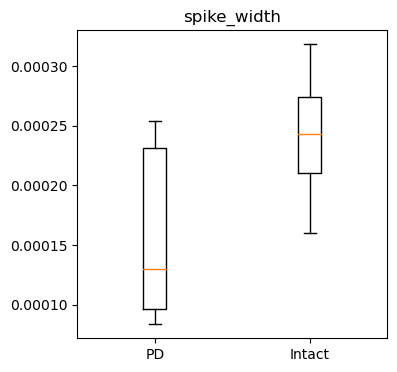

In [6]:
def compare_data(column_name,PD,In):
    #@ should be PD, Intact
    a = PD[column_name]
    b = In[column_name]
    data = [a,b]
    fig,ax=plt.subplots(figsize=(4,4))
    ax.boxplot(data)
    title = ax.set_title(column_name)
    labels = ax.set_xticklabels(["PD","Intact"])
# max	min_AHP	threshold	TTP_max	TTP_AHP	amplitude	spike_width
compare_data("spike_width",PD_selected,Intact_selected)
